In [1]:
#importing necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#preprocessing libraries
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#model buildimg libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation metrics for the models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [2]:
os.chdir('C:\\Users\\Aakash\\Desktop\\Data Analytics\\Project\\Dataset')

In [3]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [4]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## Finding the numerical and categorical features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

## Checking for missing values

In [6]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

## Filling out the missing values

<AxesSubplot:ylabel='Arrival Delay'>

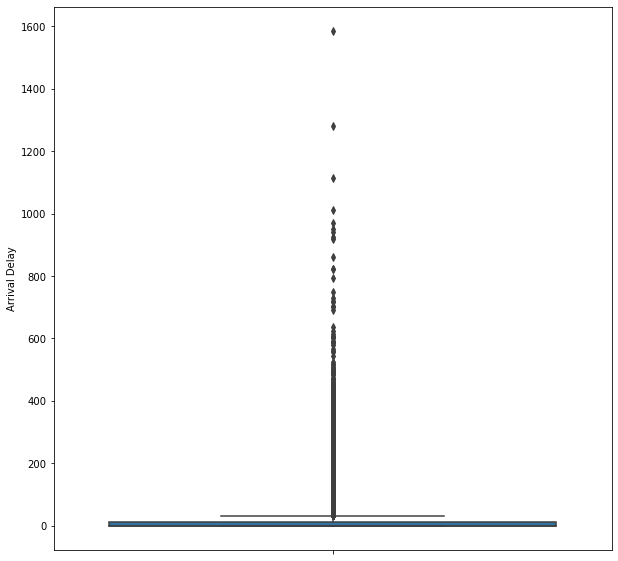

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(y='Arrival Delay', data=df )

In [8]:
## Since, there are outliers in arrival delay feature. Will replace the missing values with median.

In [9]:
df['Arrival Delay']=df['Arrival Delay'].fillna(df['Arrival Delay'].median())

In [10]:
df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

## Univariate Analysis

Text(0, 0.5, 'No.of people')

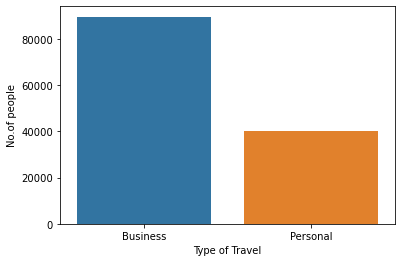

In [11]:
sns.countplot(x='Type of Travel', data=df)
plt.xlabel("Type of Travel")
plt.ylabel("No.of people")

In [12]:
# From the plot, it looks like most of the passengers are travelling for Business reasons.

([<matplotlib.patches.Wedge at 0x2315aff6190>,
 [Text(-0.22488421808296186, 1.0767669610724575, 'Satisfied'),
  Text(0.22488411726876187, -1.0767669821276329, 'Not Satisfied')],
 [Text(-0.12266411895434282, 0.5873274333122495, '57%'),
  Text(0.12266406396477919, -0.5873274447968906, '43%')])

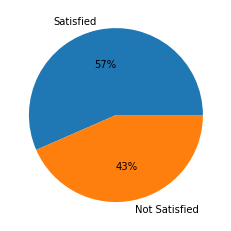

In [13]:
plt.pie(df['Satisfaction'].value_counts(), data=df, labels=['Satisfied','Not Satisfied'], autopct='%.0f%%')

In [14]:
# More Number of people are satisfied with the journey, although the margin is not that great.

<AxesSubplot:xlabel='Class', ylabel='count'>

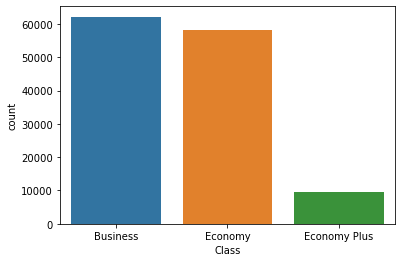

In [15]:
sns.countplot( x='Class', data=df)

In [16]:
# People frequently, either choose Business Class or Economy Class.
# The Number for Economy Plus is very less compared to other classes.

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

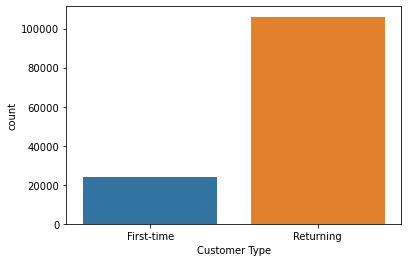

In [17]:
sns.countplot(x='Customer Type', data=df)

In [18]:
# The graph shows that the first time passengers are very less.

<AxesSubplot:xlabel='In-flight Service'>

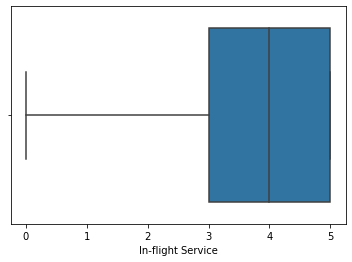

In [19]:
sns.boxplot(x='In-flight Service', data=df)

In [20]:
# In-Flight Services got a rating from 3-5.

<AxesSubplot:xlabel='In-flight Wifi Service', ylabel='Count'>

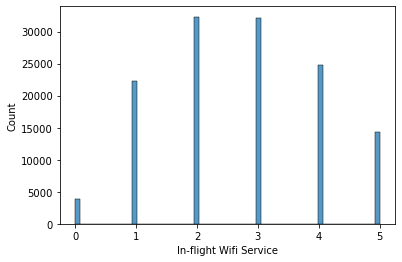

In [21]:
sns.histplot(df['In-flight Wifi Service'])

In [22]:
# The Inflight wifi service got a rating between 2 to 4. Majority of them are 2 and 3.

<AxesSubplot:xlabel='In-flight Entertainment', ylabel='count'>

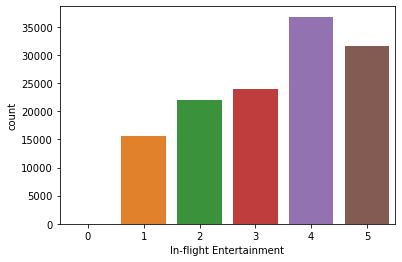

In [23]:
sns.countplot(df['In-flight Entertainment'])

In [24]:
# The Rating for in flight entertainment seems to be very good. With, most of them got 4 and 5.

## Bi-Variate Analysis

<AxesSubplot:xlabel='Satisfaction', ylabel='count'>

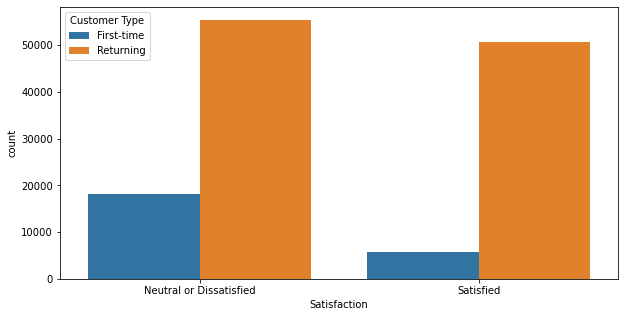

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df['Satisfaction'], hue=df['Customer Type'])


In [26]:
#The no of first time customers who are satisfied with their travel is very less.

<AxesSubplot:xlabel='Age', ylabel='count'>

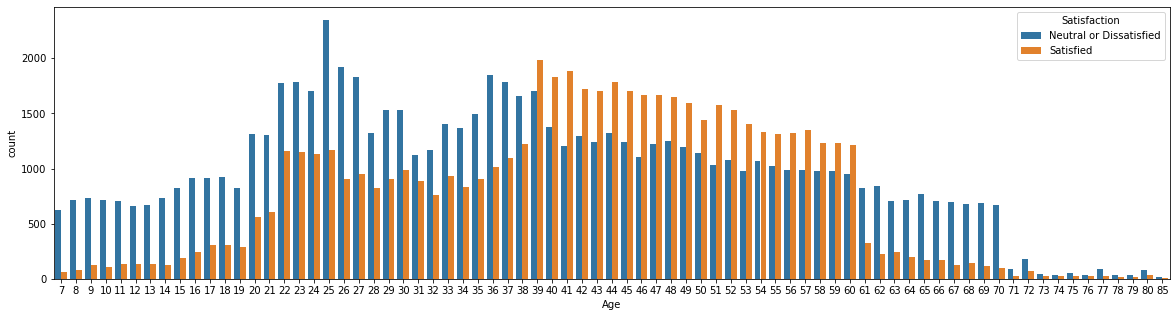

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(df['Age'], hue=df['Satisfaction'])

In [28]:
# People between the age 39 and 60 are the ones who are satisfied with their travel.

<AxesSubplot:xlabel='Age', ylabel='count'>

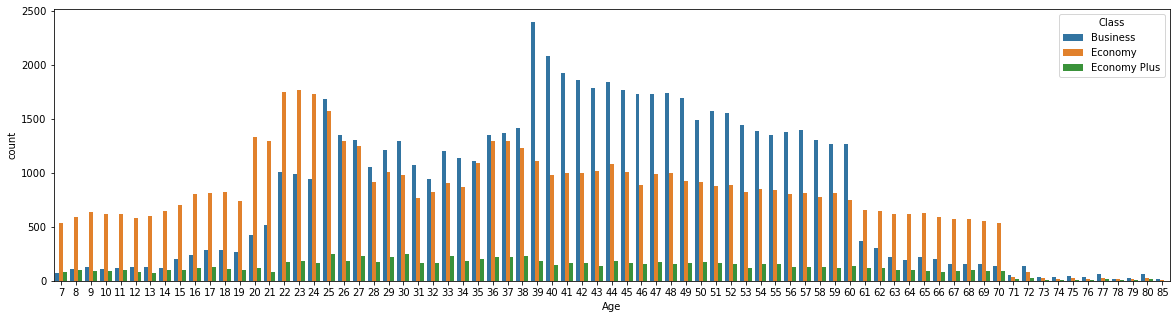

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(df['Age'], hue=df['Class'])

In [30]:
# And, the people from the age 39 to 60, prefer to travel in Business Class.

<AxesSubplot:xlabel='Age', ylabel='count'>

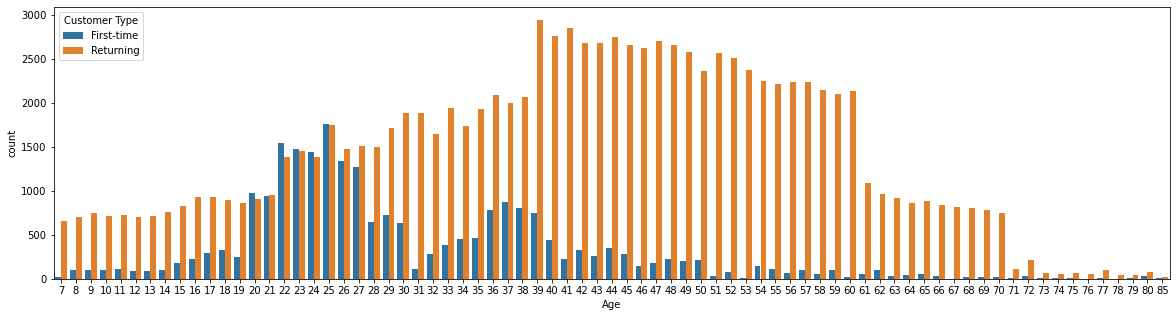

In [31]:
plt.figure(figsize=(20,5))
sns.countplot(df['Age'], hue=df['Customer Type'])

In [32]:
#The First time customers who are travelling in the flight range between the age of 20 and 25.

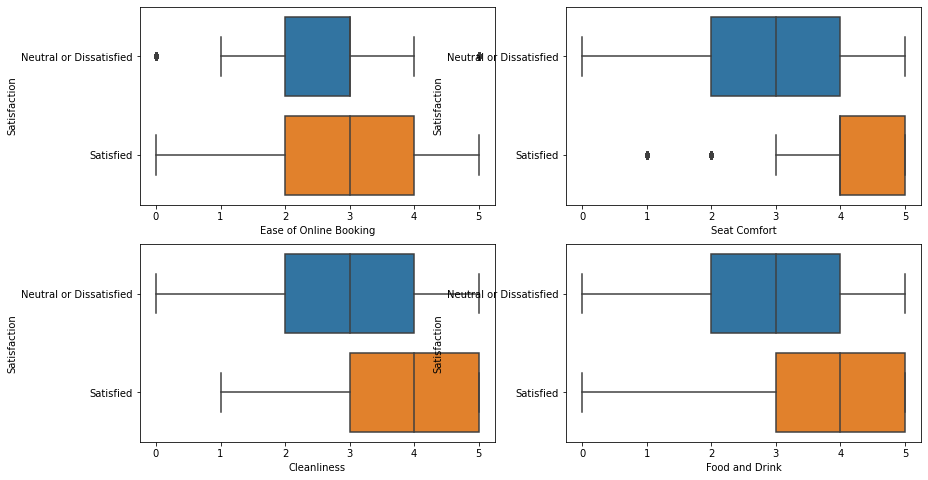

In [33]:
fig, axes = plt.subplots(2,2, figsize=(14,8))

sns.boxplot(df['Ease of Online Booking'], df['Satisfaction'], ax=axes[0,0])
sns.boxplot(df['Seat Comfort'], df['Satisfaction'], ax=axes[0,1])
sns.boxplot(df['Cleanliness'], df['Satisfaction'], ax=axes[1,0])
sns.boxplot(df['Food and Drink'], df['Satisfaction'], ax=axes[1,1])

plt.show()

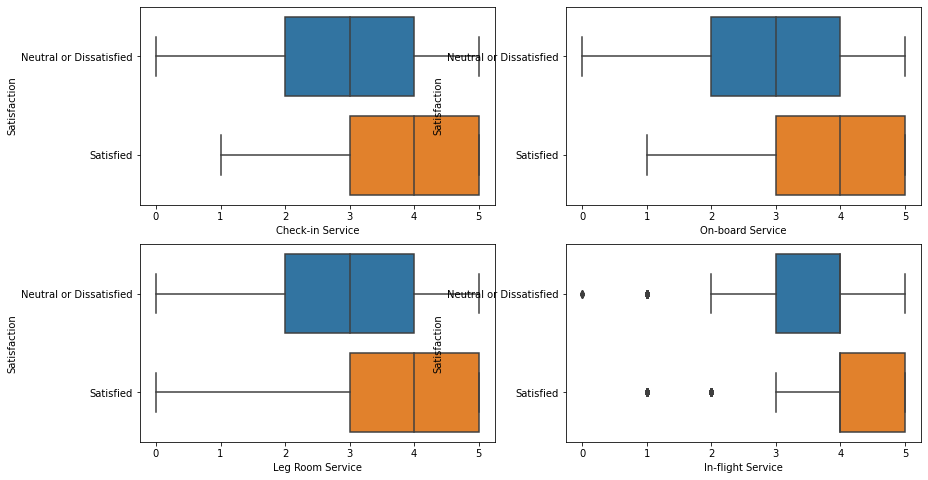

In [34]:
fig, axes = plt.subplots(2,2, figsize=(14,8))

sns.boxplot(df['Check-in Service'], df['Satisfaction'], ax=axes[0,0])
sns.boxplot(df['On-board Service'], df['Satisfaction'], ax=axes[0,1])
sns.boxplot(df['Leg Room Service'], df['Satisfaction'], ax=axes[1,0])
sns.boxplot(df['In-flight Service'], df['Satisfaction'], ax=axes[1,1])

plt.show()

From the above two plots, it's clear that the satisfied passengers gave a rating between 3 and 5 for the majority of the services in the plane. 

In [35]:
#The plot shows that Business Class passengers are mostly satisfied with their journey compared 

## Outlier Treatment

Removing the outliers from the dataset

In [36]:
Q1 = df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1
IQR

ID                                        64939.5
Age                                          24.0
Flight Distance                            1330.0
Departure Delay                              12.0
Arrival Delay                                13.0
Departure and Arrival Time Convenience        2.0
Ease of Online Booking                        2.0
Check-in Service                              1.0
Online Boarding                               2.0
Gate Location                                 2.0
On-board Service                              2.0
Seat Comfort                                  3.0
Leg Room Service                              2.0
Cleanliness                                   2.0
Food and Drink                                2.0
In-flight Service                             2.0
In-flight Wifi Service                        2.0
In-flight Entertainment                       2.0
Baggage Handling                              2.0
dtype: float64

In [37]:
df.shape

(129880, 24)

In [38]:
df = df[~((df< (Q1 - 1.5*IQR)) |(df> (Q3 + 1.5*IQR))).any(axis=1)]
df.shape

(93648, 24)

## Feature Engineering

Dropping Unnecessary columns

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93648 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      93648 non-null  int64  
 1   Gender                                  93648 non-null  object 
 2   Age                                     93648 non-null  int64  
 3   Customer Type                           93648 non-null  object 
 4   Type of Travel                          93648 non-null  object 
 5   Class                                   93648 non-null  object 
 6   Flight Distance                         93648 non-null  int64  
 7   Departure Delay                         93648 non-null  int64  
 8   Arrival Delay                           93648 non-null  float64
 9   Departure and Arrival Time Convenience  93648 non-null  int64  
 10  Ease of Online Booking                  93648 non-null  i

In [40]:
df.drop('ID', axis=1, inplace=True)  # Since id is not important for analysis, it's best to remove the column.

## Feature Encoding

Label Encoding the categorical variables

In [41]:
encoder={}
for i in df.select_dtypes(include='object').columns:
    encoder[i]=LabelEncoder()
    df[i]=encoder[i].fit_transform(df[i])
    

In [42]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1
6,1,43,1,0,0,1963,0,0.0,3,3,...,5,5,5,4,5,5,3,5,5,1


## Feature Selection

Selecting the important features which are highly correlated with the target variable.

#### Selection of features using correlation

In [43]:
X= df.drop('Satisfaction', axis=1)
Y= df['Satisfaction']

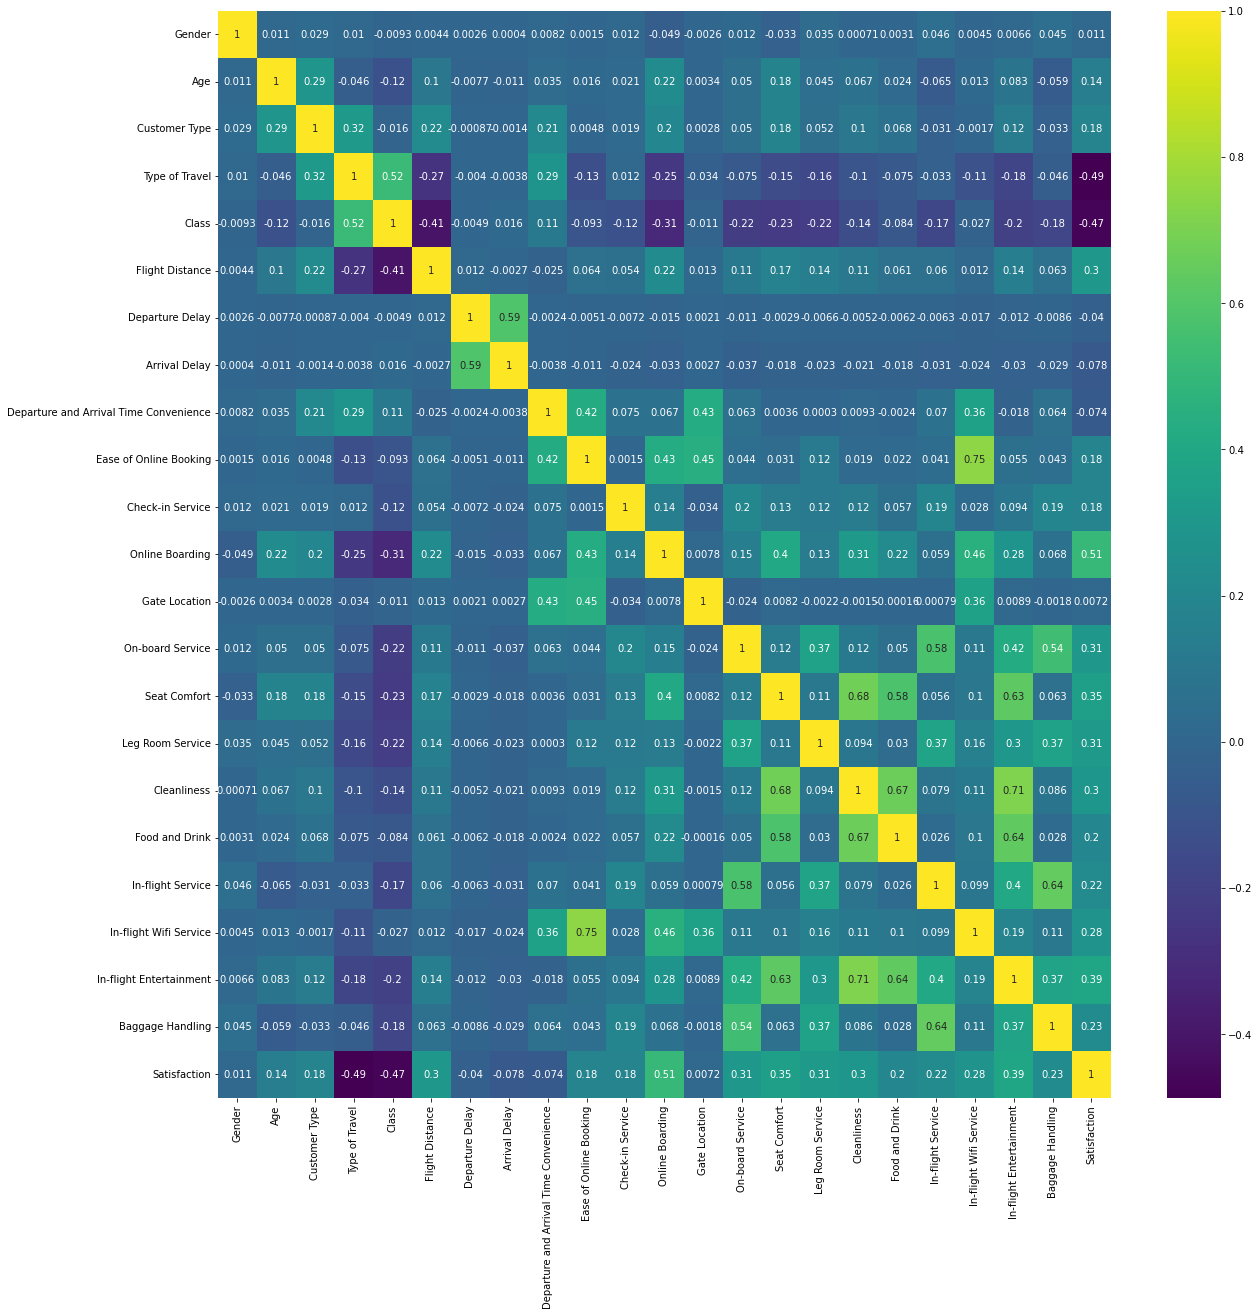

In [44]:
plt.figure(figsize=(20,20))
cor= df.corr()
sns.heatmap(cor, annot=True, cmap='viridis')
plt.show()

In [45]:
print(cor['Satisfaction'].nlargest(12))

Satisfaction               1.000000
Online Boarding            0.508265
In-flight Entertainment    0.390191
Seat Comfort               0.345562
Leg Room Service           0.313230
On-board Service           0.306936
Flight Distance            0.303749
Cleanliness                0.296636
In-flight Wifi Service     0.277998
Baggage Handling           0.227046
In-flight Service          0.220526
Food and Drink             0.195326
Name: Satisfaction, dtype: float64


In [46]:
#From the correlation matrix, the other features which are highly correlated with the satisfaction feature are shown above.

#### Selection of features using chi2

In [47]:
Features= SelectKBest(score_func= chi2, k=12)
BestFeatures = Features.fit(X,Y)
B_features= BestFeatures.transform(X)
print(X.columns[BestFeatures.get_support(indices=True)])

Index(['Age', 'Type of Travel', 'Class', 'Flight Distance', 'Arrival Delay',
       'Online Boarding', 'On-board Service', 'Seat Comfort',
       'Leg Room Service', 'Cleanliness', 'In-flight Wifi Service',
       'In-flight Entertainment'],
      dtype='object')


# Model Building

The Best features which we got from the correlation and chi2 method are used for building the model.

### Train Test Split

In [48]:
Features=['Class','Flight Distance','Online Boarding', 'On-board Service', 'Seat Comfort',
              'Leg Room Service', 'Cleanliness', 'In-flight Wifi Service',
             'In-flight Entertainment','Baggage Handling','In-flight Service']
Target=['Satisfaction']

In [49]:
x=df[Features]
y= df[Target]

In [50]:
# Splitting the data into training and testing data.

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=15)

In [51]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(65553, 11)
(28095, 11)
(65553, 1)
(28095, 1)


### Check for the nature of dataset - balanced or imbalanced

<AxesSubplot:xlabel='Satisfaction', ylabel='count'>

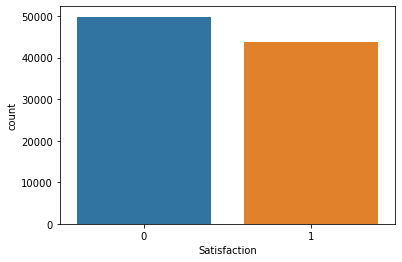

In [52]:
sns.countplot(x=df['Satisfaction'])

In [53]:
#The above plot shows a distribution of around 55:45 between neutral/dissatisfied passengers and satisfied passengers respectively. 
#So the data is quite balanced

In [54]:
#Function to create a model and print out the scores for each model.

def model(model,xtrain,ytrain,xtest,ytest):
    model.fit(xtrain,ytrain)
    ypred_train=model.predict(xtrain)
    ypred_test= model.predict(xtest)
    accuracy_train= accuracy_score(ytrain,ypred_train)
    accuracy_test=accuracy_score(ytest,ypred_test)
    roc_auc= roc_auc_score(ytest,ypred_test)
    print('Accuracy Score of Train Data :',accuracy_train)
    print('Accuracy Score of Test Data :',accuracy_test)
    print('ROC_AUC Score:',roc_auc)
    print(classification_report(ytest,ypred_test))

### Logistic Regression

In [55]:
model1= LogisticRegression(max_iter=1000)

model(model1,xtrain,ytrain,xtest,ytest)

Accuracy Score of Train Data : 0.8306103458270407
Accuracy Score of Test Data : 0.8331375689624488
ROC_AUC Score: 0.8317137769331705
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     14902
           1       0.83      0.81      0.82     13193

    accuracy                           0.83     28095
   macro avg       0.83      0.83      0.83     28095
weighted avg       0.83      0.83      0.83     28095



### K Nearest Neighbour

In [56]:
model2 = KNeighborsClassifier(n_neighbors=5)

model(model2,xtrain,ytrain,xtest,ytest)

Accuracy Score of Train Data : 0.8881820816743704
Accuracy Score of Test Data : 0.8409325502758498
ROC_AUC Score: 0.8379882373170751
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     14902
           1       0.86      0.79      0.82     13193

    accuracy                           0.84     28095
   macro avg       0.84      0.84      0.84     28095
weighted avg       0.84      0.84      0.84     28095



### Decision Tree

In [57]:
model3 = DecisionTreeClassifier(max_depth=12, max_features='sqrt')

model(model3,xtrain,ytrain,xtest,ytest)

Accuracy Score of Train Data : 0.9287141702134151
Accuracy Score of Test Data : 0.9150738565581065
ROC_AUC Score: 0.9141716889005949
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     14902
           1       0.92      0.90      0.91     13193

    accuracy                           0.92     28095
   macro avg       0.92      0.91      0.91     28095
weighted avg       0.92      0.92      0.92     28095



### Random Forest

In [58]:
model4 = RandomForestClassifier(max_depth=12, max_samples=1000)

model(model4, xtrain, ytrain, xtest, ytest)

Accuracy Score of Train Data : 0.9248852073894406
Accuracy Score of Test Data : 0.9219789998220324
ROC_AUC Score: 0.9218717801397082
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     14902
           1       0.91      0.92      0.92     13193

    accuracy                           0.92     28095
   macro avg       0.92      0.92      0.92     28095
weighted avg       0.92      0.92      0.92     28095



From the above four models, Random Forest gives the best accuracy for both training and testing data.